In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## U2M

In [ ]:
df_2006 = pd.read_json('2006_USPTO.json')
df_2007 = pd.read_json('2007_USPTO.json')
df_2008 = pd.read_json('2008_USPTO.json')
df_2009 = pd.read_json('2009_USPTO.json')
df_2010 = pd.read_json('2010_USPTO.json')
df_2011 = pd.read_json('2011_USPTO.json')
df_2012 = pd.read_json('2012_USPTO.json')
df_2013 = pd.read_json('2013_USPTO.json')
df_2014 = pd.read_json('2014_USPTO.json')
df_2015 = pd.read_json('2015_USPTO.json')

In [ ]:
df = pd.concat([df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015], axis=0, ignore_index=True)

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=101)

In [ ]:
#df = df[:1000000]

In [ ]:
print(f"There are {len(df)} rows in the dataset.")

There are 2000147 rows in the dataset.


In [ ]:
total_duplicate_titles = sum(df["Title"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles.")

In [ ]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    df,
    test_size=test_split
)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 1800132
Number of rows in validation set: 100008
Number of rows in test set: 100007


In [ ]:
Subclass_labels = tf.ragged.constant(train_df["Subclass_labels"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(Subclass_labels)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab Subclass_labels."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'G06F', 'H01L', 'H04L', 'A61K', 'H04N', 'G06K', 'H04B', 'A61B', 'G01N', 'G02B', 'C07D', 'G06Q', 'H04M', 'H04W', 'C12N', 'G09G', 'G11C', 'G11B', 'G01R', 'B32B', 'A61F', 'H01R', 'B41J', 'H04J', 'G03G', 'G02F', 'H05K', 'B01D', 'A61M', 'C07C', 'A01H', 'C07K', 'H01M', 'H01J', 'B65D', 'C07H', 'G08B', 'G03B', 'A01N', 'C12Q', 'H03K', 'E21B', 'B29C', 'C12P', 'H03M', 'F21V', 'H04Q', 'A61N', 'A63B', 'H05B', 'G01B', 'C08F', 'B01J', 'B60R', 'G06T', 'F16H', 'A63F', 'H01Q', 'G01C', 'G03F', 'C08G', 'H04R', 'B65H', 'H02K', 'C08L', 'B05D', 'G10L', 'G05F', 'G05B', 'C09K', 'B62D', 'H02J', 'H01H', 'C23C', 'G01J', 'G01S', 'F16K', 'G01V', 'C08K', 'H01S', 'H02P', 'G05D', 'B23K', 'F16L', 'A61P', 'F16D', 'H04K', 'B65G', 'B60K', 'B65B', 'H03F', 'H02H', 'F02M', 'H02M', 'C01B', 'B23P', 'A01K', 'F01D', 'A47B', 'A47C', 'G06G', 'F02B', 'H03L', 'H01F', 'G01M', 'C02F', 'G01F', 'H01B', 'F01N', 'B21D', 'E04B', 'C09D', 'F16C', 'H03H', 'B08B', 'F04B', 'G01L', 'B05B', 'C07F', 'B60Q', 'C04B', 'F02D', '

In [ ]:
print(len(vocab))

632


In [ ]:
sample_label = train_df["Subclass_labels"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['E21B']
Label-binarized representation: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
train_df["Abstract"].apply(lambda x: len(x.split(" "))).describe()

count    1.800132e+06
mean     1.090734e+02
std      4.308891e+01
min      1.000000e+00
25%      7.800000e+01
50%      1.110000e+02
75%      1.410000e+02
max      5.090000e+02
Name: Abstract, dtype: float64

In [ ]:
max_seqlen = 109
batch_size = 32
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def unify_text_length(text, label):
    # Split the given abstract and calculate its length.
    word_splits = tf.strings.split(text, sep=" ")
    sequence_length = tf.shape(word_splits)[0]

    # Calculate the padding amount.
    padding_amount = max_seqlen - sequence_length

    # Check if we need to pad or truncate.
    if padding_amount > 0:
        unified_text = tf.pad([text], [[0, padding_amount]], constant_values="<pad>")
        unified_text = tf.strings.reduce_join(unified_text, separator="")
    else:
        unified_text = tf.strings.reduce_join(word_splits[:max_seqlen], separator=" ")

    # The expansion is needed for subsequent vectorization.
    return tf.expand_dims(unified_text, -1), label


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["Subclass_labels"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["Abstract"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    dataset = dataset.map(unify_text_length, num_parallel_calls=auto).cache()
    return dataset.batch(batch_size)

In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [ ]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text[0]}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'a grounding system for a semiconductor module of a variable speed drive includes a first conductive layer a second conductive layer a substrate disposed between the first conductive layer and the second conductive layer and a base attached to the second conductive layer the base being connected to earth ground via a grounding harness the first conductive layer is in electrical contact with the semiconductor module and the substrate and electrically insulated from the second conductive layer by the substrate the second conductive layer is in electrical contact with the substrate and disposed between the substrate and the base in electrical communication with an earth ground the first conductive'
Label(s): ['H01L']
 
Abstract: b'an obstacle detection device mountable on a surface of a movable body includes a transmitting portion for transmitting a transmitting wave a receiving portion for receiving a reflected wave from an obstacle a distance calculating portion a direction c

In [ ]:
train_df["total_words"] = train_df["Abstract"].str.split().str.len()
vocabulary_size = train_df["total_words"].max()
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 509


In [ ]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

In [ ]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]  # More on why "sigmoid" has been used here in a moment.
    )
    return shallow_mlp_model

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
epochs = 2

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy",f1_m,precision_m, recall_m]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)

Epoch 1/2
56255/56255 [==============================] - 1347s 24ms/step - loss: 0.0084 - categorical_accuracy: 0.3575 - f1_m: 0.2610 - precision_m: 0.6900 - recall_m: 0.1642 - val_loss: 0.0080 - val_categorical_accuracy: 0.3654 - val_f1_m: 0.2498 - val_precision_m: 0.7397 - val_recall_m: 0.1531
Epoch 2/2
56255/56255 [==============================] - 1320s 23ms/step - loss: 0.0080 - categorical_accuracy: 0.3704 - f1_m: 0.2768 - precision_m: 0.7069 - recall_m: 0.1752 - val_loss: 0.0080 - val_categorical_accuracy: 0.3688 - val_f1_m: 0.2527 - val_precision_m: 0.7339 - val_recall_m: 0.1554recision_m: 0.7068 - recall_m:   - ETA: 45s - loss: 0.0080 - categorical_accuracy: 0.3704 - f1_m - ETA: 42s - loss: 0.0080 - categorical_accuracy: 0.3704 - f1_m: 0.2768 - precision_m: 0.70 - ETA: 40s - loss: 0.0080 - categorical_accuracy: 0.3704 - f1_m: 0.2768 - - ETA:   - ETA: 1s - loss: 0.0080 - categorical_accuracy: 0.3704 - f1_m: 0.2


In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
 
# plot_model(shallow_mlp_model, to_file='/content/drive/MyDrive/figures/classification/dl_model_classification_50.png', show_shapes=True, show_layer_names=True, dpi=50)
# plot_model(shallow_mlp_model, to_file='/content/drive/MyDrive/figures/classification/dl_model_classification_400.png', show_shapes=True, show_layer_names=True, dpi=400)

In [ ]:
a = len(history.history["loss"])

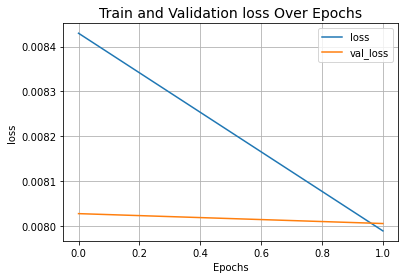

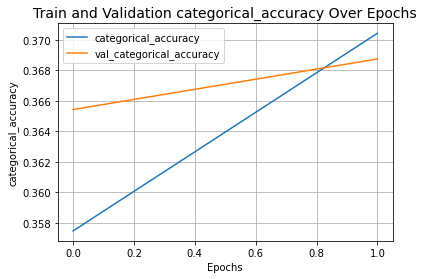

In [ ]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("categorical_accuracy")

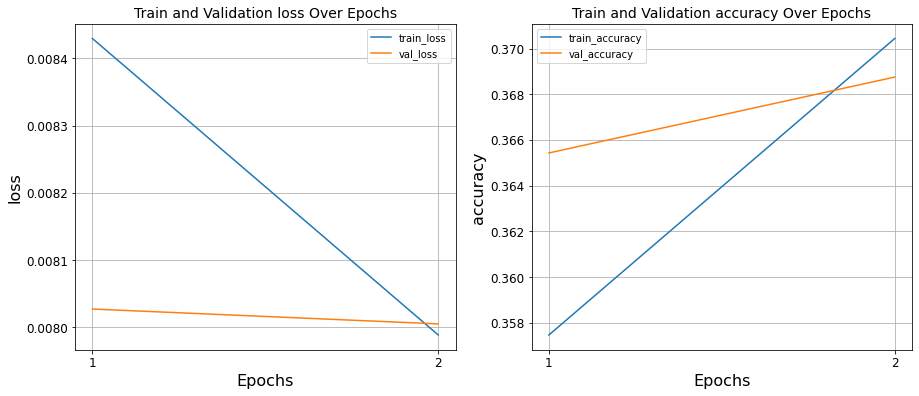

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1) 
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("loss", fontsize=16)
plt.xticks(np.arange(a), np.arange(1, a+1), fontsize=12)
#plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train and Validation loss Over Epochs", fontsize=14)
plt.legend()
plt.grid()
# plt.show()
plt.subplot(1, 2, 2) 
plt.plot(history.history["categorical_accuracy"], label="train_accuracy")
plt.plot(history.history["val_categorical_accuracy"], label="val_accuracy")
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("accuracy",fontsize=16)
plt.xticks(np.arange(a), np.arange(1, a+1), fontsize=12)
#plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train and Validation accuracy Over Epochs", fontsize=14)
plt.legend()
plt.grid()
#plt.savefig('cl_dl_loss_50', dpi=50,  bbox_inches='tight', transparent=True, pad_inches=0)
#plt.savefig('cl_dl_loss_400', dpi=400,  bbox_inches='tight', transparent=True, pad_inches=0)

plt.show()

In [ ]:
_, categorical_acc, f1_m, precision_m, recall_m = shallow_mlp_model.evaluate(test_dataset)
print(f"accuracy on the test set: {round(categorical_acc * 100, 2)}%.")
print(f"f1 on the test set: {round(f1_m * 100, 2)}%.")
print(f"precision on the test set: {round(precision_m * 100, 2)}%.")
print(f"recall on the test set: {round(recall_m * 100, 2)}%.")


3126/3126 [==============================] - 31s 10ms/step - loss: 0.0080 - categorical_accuracy: 0.3723 - f1_m: 0.2571 - precision_m: 0.7346 - recall_m: 0.1586
accuracy on the test set: 37.23%.
f1 on the test set: 25.71%.
precision on the test set: 73.46%.
recall on the test set: 15.86%.


In [ ]:
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

In [ ]:
labels = tf.ragged.constant(test_df["Subclass_labels"].values)
label_binarized = lookup(labels).numpy()
dataset = test_df["Abstract"].values

In [ ]:
label_binarized.shape

(100007, 632)

In [ ]:
predicted_probabilities = model_for_inference.predict(dataset)

In [ ]:
# # Create a model for inference.
# model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# # Create a small dataset just for demoing inference.
# inference_dataset = make_dataset(test_df.sample(100), is_train=False)
# text_batch, label_batch = next(iter(inference_dataset))
# predicted_probabilities = model_for_inference.predict(text_batch)

In [ ]:
print(predicted_probabilities.shape)
print(label_binarized.shape)

(100007, 632)
(100007, 632)


In [ ]:
predicted_probabilities[0]
label_binarized[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_te_true = label_binarized

### Threshold results

In [ ]:
y_te_pred = [[1 if pred>=0.9 else 0 for pred in row] for row in predicted_probabilities]

### Top @ results

In [ ]:
top_k = 10

In [ ]:
y_te_pre = np.zeros_like(predicted_probabilities)
print(y_te_pre.shape)

(100007, 632)


In [ ]:
top_k_ind = [np.argpartition(x_in, -top_k)[-top_k:] for x_in in predicted_probabilities]
top_k_ind_arr = np.array(top_k_ind)

In [ ]:
for i in range(y_te_pre.shape[0]):
  a = y_te_pre[i]
  b = top_k_ind_arr[i]
  a[b] = 1
  y_te_pre[i] = a 

In [ ]:
# y_te_pre[0]

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_curve, confusion_matrix, roc_auc_score, classification_report, recall_score

### Threshold

In [ ]:
precision_score(y_te_true, y_te_pred, average='micro')

0.9160544005002345

In [ ]:
recall_score(y_te_true, y_te_pred, average='micro')

0.043700361683880834

In [ ]:
f1_score(y_te_true, y_te_pred, average='micro')

0.08342112006377587

In [ ]:
label_batch

### Top@ results

In [ ]:
precision_score(y_te_true, y_te_pre, average='micro')

0.0927245092843501

In [ ]:
recall_score(y_te_true, y_te_pre, average='micro')

0.6915321227487975

In [ ]:
f1_score(y_te_true, y_te_pre, average='micro')

0.1635229441924235

In [ ]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text[0]}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = [
        x
        for _, x in sorted(
            zip(predicted_probabilities[i], lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        )
    ][:3]
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

Abstract: b'a light emitting device includes a substrate a doped substrate layer a layer of first conductivity type overlying the doped substrate layer a light emitting layer overlying the layer of first conductivity type and a layer of second conductivity type overlying the light emitting layer a conductive transparent layer e g of indium tin oxide and a reflective metal layer overlie the layer of second conductivity type and provide electrical contact with the layer of second conductivity type a plurality of vias may be formed in the reflective metal and conductive transparent layer as well as the layer of second conductivity type down to the doped substrate'
Label(s): ['H01L']
Predicted Label(s): (H01L, H01J, H01S)
 
Abstract: b'a hood elevation system for a vehicle includes an actuator configured to selectively move at least a portion of a vehicle hood between an elevated and a retracted position the hood elevation system also includes a self locking mechanism configured to allow m